In [39]:
!pip install astroML

In [40]:
import numpy as np
import numpy as np
from tqdm.notebook import tqdm
import pylab as plt
from matplotlib import pyplot as plt
import math
from astroML.datasets import fetch_dr7_quasar
from scipy.interpolate import interp1d

data = fetch_dr7_quasar()

#Select the first 10000 points
data = data[:10000]

z = data['redshift']

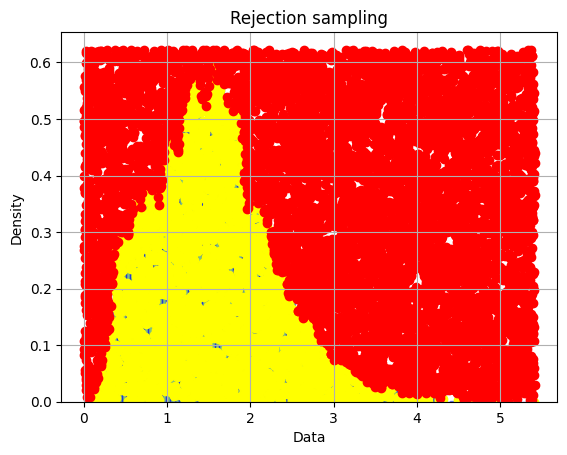

In [69]:
hist = plt.hist(z, bins = 100, density=True, alpha = 0.5, color = 'g', edgecolor = 'blue')

N = 10000

#hist[0] : altezze bin
#hist[1] : bordi bin
#hist[2] : valori

counts = hist[0]
bin_edges = hist[1]

#Altezza massima isto
y_max = np.max(hist[0])

#Valore massimo di z
x_max = np.max(z)

x = np.random.uniform(0,x_max,N)
y = np.random.uniform(0,y_max,N)

hist_interp = np.interp(x, (bin_edges[:-1] + bin_edges[1:]) / 2, counts)


plt.scatter(x[y<hist_interp],y[y<hist_interp],c='yellow')
plt.scatter(x[y>hist_interp],y[y>hist_interp],c='red')

plt.xlabel("Data")
plt.ylabel("Density")
plt.title("Rejection sampling")

plt.grid()
plt.show()
goodpoints = x[y<hist_interp]


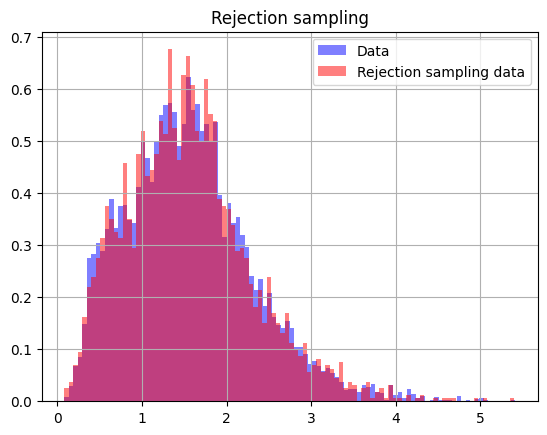

In [70]:
hist = plt.hist(z, bins = 100, density=True, alpha = 0.5, color = 'blue', label = "Data")
hist_good = plt.hist(goodpoints, bins = 100, density=True, alpha = 0.5, color = 'red', label = "Rejection sampling data")
plt.title("Rejection sampling")
plt.grid()
plt.legend()

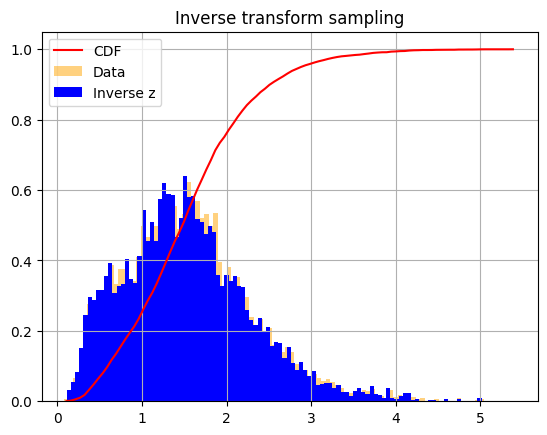

In [71]:
CDF = np.cumsum(counts)  # Somma cumulativa delle frequenze
CDF = CDF / CDF[-1]  # Normalizzazione per avere CDF tra 0 e 1

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

inverse_CDF = interp1d(CDF, bin_centers)

#Prob tra 0 e 1
P = np.random.uniform(np.min(CDF),np.max(CDF),10000)
z_inverse = inverse_CDF(P)

plt.figure()
plt.plot(bin_centers, cdf, color='red', label = "CDF")
hist = plt.hist(z, bins = 100, density=True, alpha = 0.5, color = 'orange', label = "Data")
plt.hist(z_inverse, density = True, bins = 100, color='blue', label = "Inverse z")
plt.title("Inverse transform sampling")
plt.grid()
plt.legend()
plt.show()